In [71]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [72]:
df = pd.read_csv('data/hospital-costs.csv')
df.head(2)

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Code,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost
0,2011,324,Adirondack Medical Center-Saranac Lake Site,4,4,Tracheostomy W MV 96+ Hours W Extensive Proced...,Extreme,P,Surgical,3,361289.00,210882.00,196080.00,123347.00
1,2011,324,Adirondack Medical Center-Saranac Lake Site,5,4,Tracheostomy W MV 96+ Hours W/O Extensive Proc...,Extreme,P,Surgical,1,102190.00,102190.00,59641.00,59641.00


In [73]:
df['Total Charge'] = df['Discharges'] * df['Mean Charge']
df['Total Cost'] = df['Discharges'] * df['Mean Cost']
df['Markup'] = df['Total Charge'] / df['Total Cost']

In [74]:
df[(df['Facility Name'] == 'TLC Health Network Tri-County Memorial Hospital') & (df['Total Charge'] == 1540540)]

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Code,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost,Total Charge,Total Cost,Markup
370760,2009,74,TLC Health Network Tri-County Memorial Hospital,772,1,Alcohol & Drug Dependence W Rehab Or Rehab/Det...,Minor,M,Medical,115,13396.00,16159.00,847674.00,1027297.00,1540540.00,97482510.00,0.02


In [75]:
df.sort_values(by=['Markup'], ascending=True).iloc[[0,-1], [2, -3, -2, -1]]

,Facility Name,Total Charge,Total Cost,Markup
370760,TLC Health Network Tri-County Memorial Hospital,1540540.00,97482510.00,0.02
111925,SUNY Downstate Medical Center at LICH,43088.00,2068.00,20.84


In [76]:
df.groupby('APR DRG Description').sum()['Discharges'].sort_values()[-10:]

APR DRG Description
Chest Pain                                                           117630
Cardiac Arrhythmia & Conduction Disorders                            121042
Cellulitis & Other Bacterial Skin Infections                         124617
Chronic Obstructive Pulmonary Disease                                146461
Septicemia & Disseminated Infections                                 161739
Other Pneumonia                                                      162344
Heart Failure                                                        173826
Cesarean Delivery                                                    245265
Vaginal Delivery                                                     458034
Neonate Birthwt >2499G, Normal Newborn Or Neonate W Other Problem    632412
Name: Discharges, dtype: int64

In [77]:
net = df[['Facility Name', 'Total Charge', 'Total Cost']]
net.head(2)

,Facility Name,Total Charge,Total Cost
0,Adirondack Medical Center-Saranac Lake Site,1083867.00,588240.00
1,Adirondack Medical Center-Saranac Lake Site,102190.00,59641.00


In [78]:
netgroup = net.groupby('Facility Name').aggregate(['sum'])
netgroup.head()

,Total Charge,Total Cost
,sum,sum
Facility Name,,
Adirondack Medical Center-Saranac Lake Site,141573499.00,77427664.00
Albany Medical Center - South Clinical Campus,1802808.00,1432784.00
Albany Medical Center Hospital,3763945310.00,1336298908.00
Albany Memorial Hospital,221974029.00,94907174.00
Alice Hyde Medical Center,87237972.00,41058820.00


In [79]:
netgroup['Net Income'] = netgroup['Total Charge'] - netgroup['Total Cost']
netgroup.head()

,Total Charge,Total Cost,Net Income
,sum,sum,
Facility Name,,,
Adirondack Medical Center-Saranac Lake Site,141573499.00,77427664.00,64145835.00
Albany Medical Center - South Clinical Campus,1802808.00,1432784.00,370024.00
Albany Medical Center Hospital,3763945310.00,1336298908.00,2427646402.00
Albany Memorial Hospital,221974029.00,94907174.00,127066855.00
Alice Hyde Medical Center,87237972.00,41058820.00,46179152.00


In [80]:
netgroup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, Adirondack Medical Center-Saranac Lake Site to Wyoming County Community Hospital
Data columns (total 3 columns):
(Total Charge, sum)    228 non-null float64
(Total Cost, sum)      228 non-null float64
(Net Income, )         228 non-null float64
dtypes: float64(3)
memory usage: 7.1+ KB


In [81]:
netgroup.columns = ['Total Charge', 'Total Cost', 'Net Income']

In [82]:
netgroup.head()

,Total Charge,Total Cost,Net Income
Facility Name,,,
Adirondack Medical Center-Saranac Lake Site,141573499.00,77427664.00,64145835.00
Albany Medical Center - South Clinical Campus,1802808.00,1432784.00,370024.00
Albany Medical Center Hospital,3763945310.00,1336298908.00,2427646402.00
Albany Memorial Hospital,221974029.00,94907174.00,127066855.00
Alice Hyde Medical Center,87237972.00,41058820.00,46179152.00


In [84]:
netgroup.sort_values(by=['Net Income']).iloc[[0, -1]]

,Total Charge,Total Cost,Net Income
Facility Name,,,
TLC Health Network Tri-County Memorial Hospital,4212448.00,199028516.00,-194816068.00
North Shore University Hospital,7984556325.00,1933824046.00,6050732279.00


In [85]:
newdf = df[df["APR DRG Description"] == "Viral Meningitis"]
newdf.head(2)

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Code,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost,Total Charge,Total Cost,Markup
24,2011,324,Adirondack Medical Center-Saranac Lake Site,51,1,Viral Meningitis,Minor,M,Medical,1,17116.00,17116.00,7006.00,7006.00,17116.00,7006.00,2.44
557,2011,1,Albany Medical Center Hospital,51,1,Viral Meningitis,Minor,M,Medical,19,13212.00,11914.00,4569.00,3920.00,251028.00,86811.00,2.89


In [87]:
newdf = newdf[["Facility Name", "APR DRG Description","APR Severity of Illness Description","Discharges", "Mean Charge", "Median Charge", "Mean Cost"]]
newdf.head(2)

,Facility Name,APR DRG Description,APR Severity of Illness Description,Discharges,Mean Charge,Median Charge,Mean Cost
24,Adirondack Medical Center-Saranac Lake Site,Viral Meningitis,Minor,1,17116.00,17116.00,7006.00
557,Albany Medical Center Hospital,Viral Meningitis,Minor,19,13212.00,11914.00,4569.00


In [94]:
newdf[newdf['APR Severity of Illness Description'] == 'Moderate'].sort_values(by=['Mean Charge']).head(1)

,Facility Name,APR DRG Description,APR Severity of Illness Description,Discharges,Mean Charge,Median Charge,Mean Cost
258259,Aurelia Osborn Fox Memorial Hospital,Viral Meningitis,Moderate,1,1179.00,1179.00,1040.00


In [95]:
newdf[(newdf['APR Severity of Illness Description'] == 'Moderate') & (newdf['Discharges'] > 3)].sort_values(by=['Mean Charge']).head(1)

,Facility Name,APR DRG Description,APR Severity of Illness Description,Discharges,Mean Charge,Median Charge,Mean Cost
14426,Cayuga Medical Center at Ithaca,Viral Meningitis,Moderate,6,5738.00,5111.00,3949.00


In [103]:
newdf.groupby('Facility Name').aggregate(['sum'])['Discharges'].sort_values(by=['sum'], ascending=False).head()

,sum
Facility Name,
North Shore University Hospital,158
Montefiore Medical Center - Henry & Lucy Moses Div,152
Strong Memorial Hospital,117
Women And Children's Hospital Of Buffalo,116
Winthrop-University Hospital,109


In [104]:
newdf.corr()

,Discharges,Mean Charge,Median Charge,Mean Cost
Discharges,1.00,-0.11,-0.14,-0.13
Mean Charge,-0.11,1.00,0.99,0.87
Median Charge,-0.14,0.99,1.00,0.86
Mean Cost,-0.13,0.87,0.86,1.00


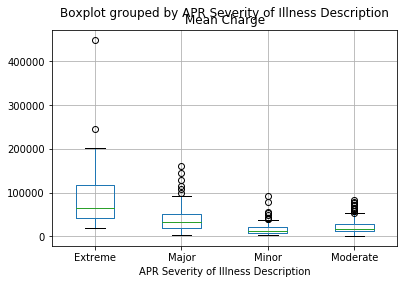

In [105]:
newdf.boxplot('Mean Charge', by='APR Severity of Illness Description')

In [112]:
df.groupby(['APR DRG Description', 'APR Severity of Illness Description']).sum()[['Discharges']].sort_values(by=['Discharges'], ascending=False).head(1)

,,Discharges
APR DRG Description,APR Severity of Illness Description,
"Neonate Birthwt >2499G, Normal Newborn Or Neonate W Other Problem",Minor,528921
